['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp_var_rate' 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'y']
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
y                 0
dtype: int64


C:\Users\chakri\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chakri\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chakri\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chakri\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

0    36548
1     4640
Name: y, dtype: int64
y                0     1
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894


C:\Users\chakri\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\chakri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['age' 'duration' 'campaign' 'pdays' 'previous' 'emp_var_rate'
 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'job_admin.'
 'job_blue-collar' 'job_entrepreneur' 'job_housemaid' 'job_management'
 'job_retired' 'job_self-employed' 'job_services' 'job_student'
 'job_technician' 'job_unemployed' 'job_unknown' 'marital_divorced'
 'marital_married' 'marital_single' 'marital_unknown' 'education_Basic'
 'education_High School' 'education_Illiterate'
 'education_Professional Course' 'education_University Degree'
 'education_Unknown' 'default_no' 'default_unknown' 'default_yes'
 'housing_no' 'housing_unknown' 'housing_yes' 'loan_no' 'loan_unknown'
 'loan_yes' 'contact_cellular' 'contact_telephone' 'month_apr' 'month_aug'
 'month_dec' 'month_jul' 'month_jun' 'month_mar' 'month_may' 'month_nov'
 'month_oct' 'month_sep' 'day_of_week_fri' 'day_of_week_mon'
 'day_of_week_thu' 'day_of_week_tue' 'day_of_week_wed' 'poutcome_failure'
 'poutcome_nonexistent' 'poutcome_success']
[36 33 15 37  1 17 34 23  1 

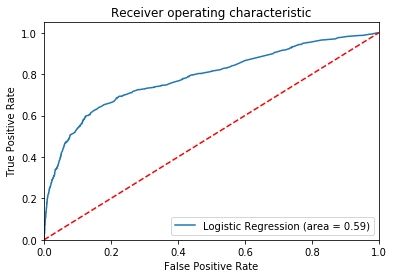

predict     0    1
actual            
0.0      3172  100
1.0       402   15


Text(0.5, 1.0, 'ROC Curve')

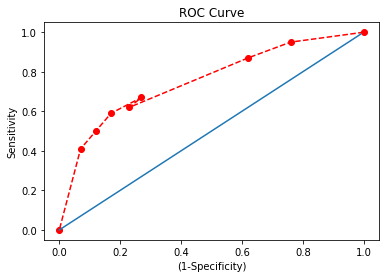

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#from ggplot import *
#import statsmodels.api as sm

df = pd.read_csv("F:/MachineLearning/FTSamples-PR/RSamples/banking-updated.csv")
print(df.columns.values)
# yes for customers who bought the term deposit and no for 
print(df.isnull().sum())
#The y column is the outcome variable recording yes and no.those who didn't.
# Let us start by converting yes-no to 0-1 so that they can be used in modelling.

df.education[df.education == 'basic.4y'] = 'Basic'
df.education[df.education == 'basic.6y'] = 'Basic'
df.education[df.education == 'basic.9y'] = 'Basic'
df.education[df.education == 'high.school'] = 'High School'
df.education[df.education == 'university.degree'] = 'University Degree'
df.education[df.education == 'unknown'] = 'Unknown'
df.education[df.education == 'professional.course'] = 'Professional Course'
df.education[df.education == 'illiterate'] = 'Illiterate'
print(df['y'].value_counts())
'''sns.countplot(x='y',data=df)
plt.show()
sns.countplot(x="marital", data=df)
plt.show()
sns.countplot(x="housing", data=df)
plt.show()
sns.countplot(x="loan", data=df)
plt.show()
sns.countplot(x="poutcome", data=df)
plt.show()'''

# print(df.groupby('y').mean())
table=pd.crosstab(df.poutcome,df.y)
print(table)
#
#pd.crosstab(data.job,data.y).plot(kind='bar')
#plt.title('Purchase Frequency for Job Title')
#plt.xlabel('Job')
#plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')

# pd.crosstab(df.education,df.y).plot(kind='bar')
# plt.title('Purchase Frequency for Education Level')
# plt.xlabel('Education')
# plt.ylabel('Frequency of Purchase')
#
# pd.crosstab(df.marital,df.y).plot(kind='bar')
# plt.title('Marital Status vs Purchase')
# plt.xlabel('Marital Status')
# plt.ylabel('Proportion of customers')

# pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
# plt.title('purchase frequency for day of week')
# plt.xlabel('day of week')
# plt.ylabel('frequency of purchase')
#
# pd.crosstab(df.month,df.y).plot(kind='bar')
# plt.title('purchase frequency for month')
# plt.xlabel('month')
# plt.ylabel('frequency of purchase')
# #
# pd.crosstab(df.poutcome,df.y).plot(kind='bar')
# plt.title('purchase frequency based on poutcome')
# plt.xlabel('poutcome')
# plt.ylabel('frequency of purchase')

for column in ['job','marital','education','default','housing',
               'loan','contact','month','day_of_week',
               'poutcome']:
    dummies = pd.get_dummies(df[column], prefix=column)
    #print(dummies)
    df = pd.concat([df, dummies], axis=1)

cat_vars=['job','marital','education','default','housing','loan',
          'contact','month', 'day_of_week','poutcome']
bank_vars=df.columns.values.tolist()

to_keep=[i for i in bank_vars if i not in cat_vars]

bank_final=df[to_keep]

#print(bank_final.columns.values)

bank_final_vars=bank_final.columns.values.tolist()
y = ['y']
X = [i for i in bank_final_vars if i not in y]

bank_final[X].drop(['cons_price_idx', 'cons_conf_idx','euribor3m','emp_var_rate','pdays'], axis=1,inplace=True)
#df1.fillna(0, inplace=True)
#print(bank_final[X].isinfinite())
print(bank_final[X].columns.values)

#Recursive Feature Elimination (RFE) is based on the idea to repeatedly 
#construct a model and choose either the best or worst performing feature, 
#setting the feature aside and then repeating the process with the rest of the 
#features. This process is applied until all features in the dataset 
#are exhausted. The goal of RFE is to select features by recursively 
#considering smaller and smaller sets of features.

#Feature Selection - Before implementing the model,
# let us perform a feature selection to decide the significant variables that can predict the outcome with great accuracy.
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(bank_final[X], bank_final[y])
#print(rfe.support_)
print(rfe.ranking_)
#previous, euribor3m,job_management, job_services, education_Unknown, contact_telephone, month_jun, month_mar, month_may, day_of_week_fri
#, day_of_week_wed, poutcome_failure, poutcome_nonexistent,poutcome_success

cols = ['previous', 'euribor3m','job_management', 'job_services',
     'education_Unknown', 'contact_telephone', 'month_jun', 'month_mar',
     'month_may', 'day_of_week_fri' ,'day_of_week_wed', 'poutcome_failure',
     'poutcome_nonexistent','poutcome_success']
X=bank_final[cols]
y=bank_final['y']
#print(X)
#print(y)
#using statsmodel
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())
################################
#Actual regression
logreg.fit(X, y)
print(logreg.score(X, y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print(classification_report(y_test, y_pred))

#model predicts probabilities and not the classes 
#(binary output, that is, 0 or 1).
#One needs to select a threshold over these probabilities to classify them 
#into two categories. Something of this sort:
# if the probability is less than the threshold, then it is a 0 outcome, 
#and if it is greater than the threshold, then it is a 1 outcome.
probs = logreg.predict_proba(X_test)
print(probs)

#The second column provides the probability of a positive outcome (purchase of a deposit outcome in our case). By default,
#if this probability is more than 0.5, then the observation is categorized as a positive outcome, and as a negative outcome if it is less than that.
predicted = logreg.predict(X_test)
print(predicted)

prob=probs[:,1]
prob_df=pd.DataFrame(prob)
prob_df['predict']=np.where(prob_df[0]>=0.50,1,0)

prob_df['actual']=y_test
print(metrics.accuracy_score(y_test, predicted))

#Cross validation
scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=8)
print(scores)
print(scores.mean())

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Receiver Operating Characteristic (ROC) curve.
#An ROC curve is a graphical tool to understand the performance of a 
#classification model.
# For a logistic regression model,
#a prediction can either be positive or negative.
#Also, this prediction can either be correct or incorrect.
confusion_matrix=pd.crosstab(prob_df['actual'],prob_df['predict'])
print(confusion_matrix)

Sensitivity=[1,0.95,0.87,0.62,0.67,0.59,0.5,0.41,0]
FPR=[1,0.76,0.62,0.23,0.27,0.17,0.12,0.07,0]
plt.plot(FPR,Sensitivity,marker='o',linestyle='--',color='r')

x1=[i*0.01 for i in range(100)]
y1=[i*0.01 for i in range(100)]

plt.plot(x1,y1)
plt.xlabel('(1-Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

# auc = metrics.auc(fpr,sensitivity)
# print(auc)
